In [1]:
import pandas as pd
pima = pd.read_csv("diabetes.csv")

In [2]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
pima.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

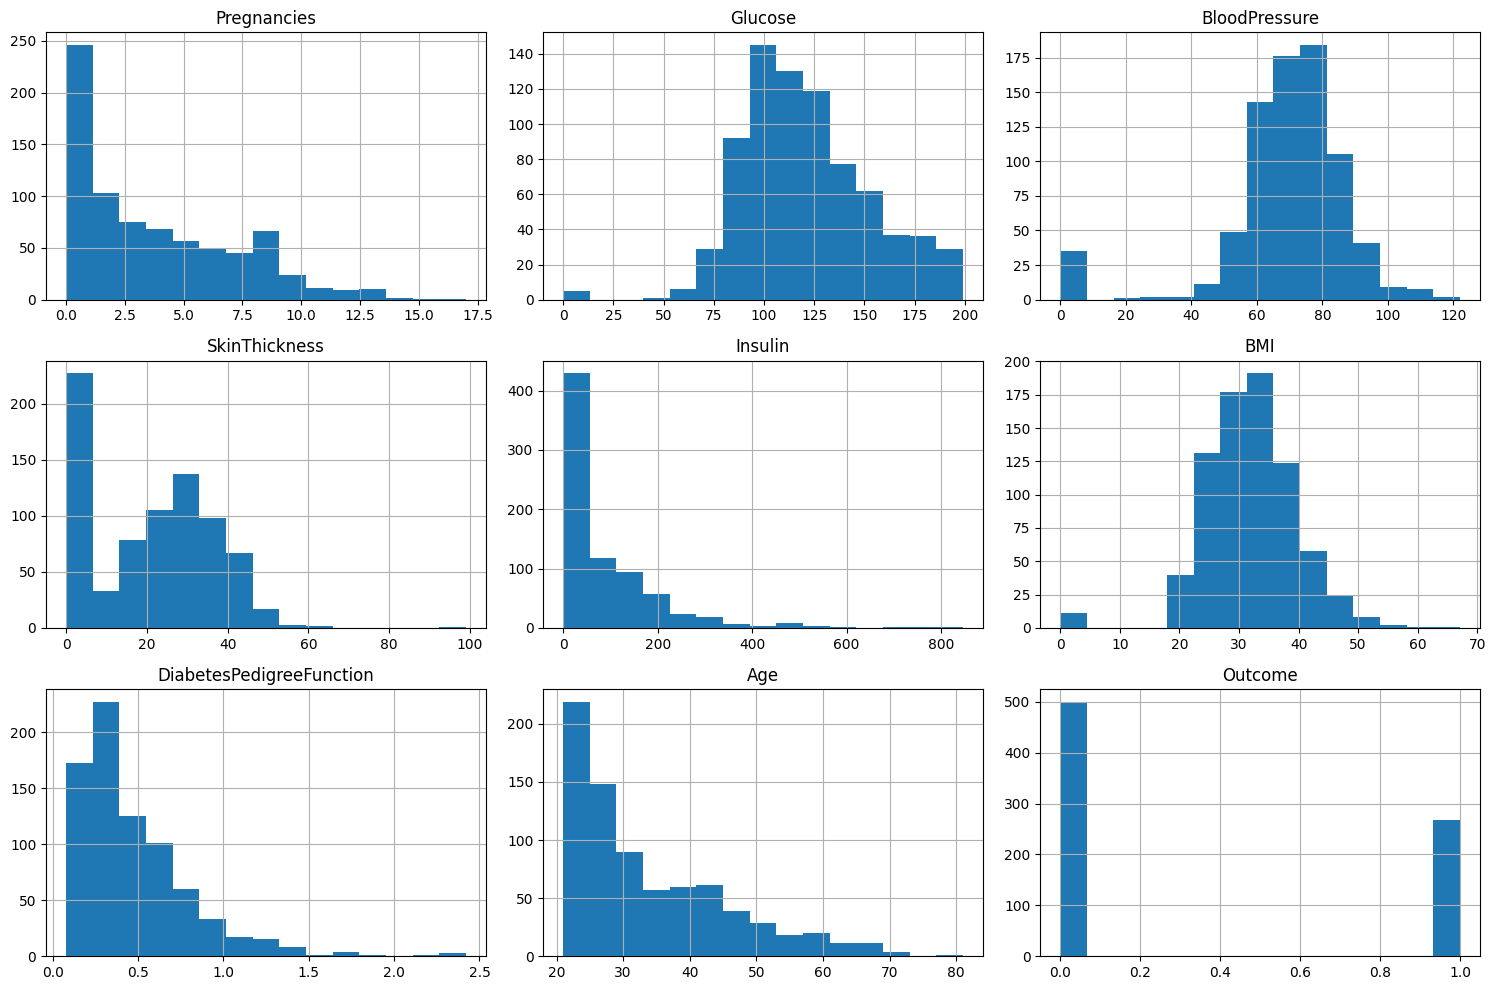

(       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
 count   768.000000  768.000000     768.000000     768.000000  768.000000   
 mean      3.845052  120.894531      69.105469      20.536458   79.799479   
 std       3.369578   31.972618      19.355807      15.952218  115.244002   
 min       0.000000    0.000000       0.000000       0.000000    0.000000   
 25%       1.000000   99.000000      62.000000       0.000000    0.000000   
 50%       3.000000  117.000000      72.000000      23.000000   30.500000   
 75%       6.000000  140.250000      80.000000      32.000000  127.250000   
 max      17.000000  199.000000     122.000000      99.000000  846.000000   
 
               BMI  DiabetesPedigreeFunction         Age     Outcome  
 count  768.000000                768.000000  768.000000  768.000000  
 mean    31.992578                  0.471876   33.240885    0.348958  
 std      7.884160                  0.331329   11.760232    0.476951  
 min      0.000000   

In [4]:
#descriptive stats
import matplotlib.pyplot as plt
import seaborn as sns

stats = pima.describe()

#missing value
missing_values = pima.isna().sum()

#plot histogram
pima.hist(bins=15,figsize=(15,10))
plt.tight_layout()
plt.show()

stats,missing_values

Three level of pre-processing:

replacing 0s scaling of features multicollinearity

In [5]:
# Replace zeros
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=0, strategy='median')
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
pima[columns_with_zeros] = imputer.fit_transform(pima[columns_with_zeros])

In [6]:
pima.min()

Pregnancies                  0.000
Glucose                     44.000
BloodPressure               24.000
SkinThickness                7.000
Insulin                     14.000
BMI                         18.200
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
dtype: float64

In [7]:
pima.columns[:-1]

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [8]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(pima.drop('Outcome', axis=1))
features_scaled_df = pd.DataFrame(features_scaled, columns=pima.columns[:-1])
features_scaled_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.679069,0.298896,2.150354,0.455573,0.064737,-0.908682,2.532136
764,-0.547919,0.011301,-0.197433,-0.239949,-0.181541,0.632365,-0.398282,-0.531023
765,0.342981,-0.021574,-0.031990,-0.695245,-0.332132,-0.910418,-0.685193,-0.275760
766,-0.844885,0.142800,-1.024647,-0.012301,-0.181541,-0.342790,-0.371101,1.170732


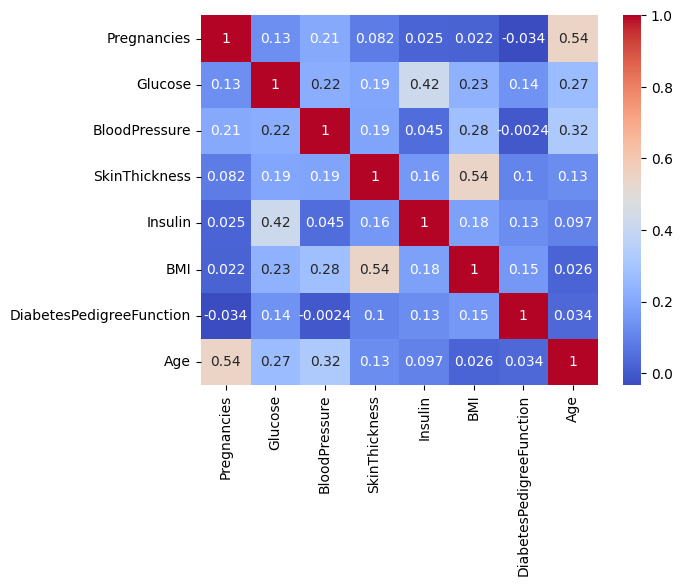

In [9]:
# Check multicollinearity
correlation_matrix = features_scaled_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = features_scaled_df.columns
vif_data['VIF'] = [variance_inflation_factor(features_scaled_df.values, i) for i in range(features_scaled_df.shape[1])]

vif_data

,feature,VIF
0,Pregnancies,1.430466
1,Glucose,1.361314
2,BloodPressure,1.242670
3,SkinThickness,1.451029
4,Insulin,1.239392
5,BMI,1.572588
6,DiabetesPedigreeFunction,1.048391
7,Age,1.616142


In [11]:
#conventional stats: logit method
# Logistic Regression with statsmodels
#import statsmodels.api as sm
import statsmodels.api as sm

X_sm = sm.add_constant(features_scaled_df)

model = sm.Logit(pima['Outcome'], X_sm)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.464090
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      759
Method:                           MLE   Df Model:                            8
Date:                Mon, 27 Jan 2025   Pseudo R-squ.:                  0.2825
Time:                        16:10:23   Log-Likelihood:                -356.42
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 5.394e-56
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.8614      0.097     -8.861      0.000      -1.052

In [12]:
import statsmodels.formula.api as smf
log_reg = smf.logit("Outcome ~ Pregnancies + Glucose + DiabetesPedigreeFunction + BMI", data=pima).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.466384
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      763
Method:                           MLE   Df Model:                            4
Date:                Mon, 27 Jan 2025   Pseudo R-squ.:                  0.2789
Time:                        16:10:23   Log-Likelihood:                -358.18
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 9.317e-59
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -9.1840      0.706    -13.015      0.000     -10.567      -7.801
Pregnancies                  0.1433      0.028      5.203      0.000       0.089       0.197
Glucose                      0.0369      0.003     10.574      0.000       0.030       0.044
DiabetesPedigreeFunction     0.8817      0.295      2.992      0.003       0.304       1.459
BMI                          0.0887      0.015      6.025      0.000       0.060       0.118
============================================================================================
"""

In [13]:
# Feature Engineering
features_scaled_df['Glucose_Insulin'] = features_scaled_df['Glucose'] * features_scaled_df['Insulin']
features_scaled_df['Age_Pregnancies'] = features_scaled_df['Age'] * features_scaled_df['Pregnancies']
features_scaled_df['BMI_Squared'] = features_scaled_df['BMI'] ** 2
features_scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Glucose_Insulin,Age_Pregnancies,BMI_Squared
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995,-0.157223,0.912562,0.027762
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672,0.218769,0.161096,0.726244
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584,-0.366107,-0.130278,1.775557
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549,0.580415,0.879990,0.401806
4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496,0.159683,0.023404,2.400338


In [14]:
#conventional stats: logit method
# Logistic Regression with statsmodels
#import statsmodels.api as sm

X_sm = sm.add_constant(features_scaled_df)
model = sm.Logit(pima['Outcome'], X_sm)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.453143
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      756
Method:                           MLE   Df Model:                           11
Date:                Mon, 27 Jan 2025   Pseudo R-squ.:                  0.2994
Time:                        16:10:23   Log-Likelihood:                -348.01
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 3.009e-57
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.5690      0.122     -4.677      0.000      -0.807

In [15]:
fnew = features_scaled_df.drop(["SkinThickness","Insulin","BloodPressure","BMI_Squared","Glucose_Insulin","Age"],axis=1)
X_sm = sm.add_constant(fnew)

model = sm.Logit(pima['Outcome'], X_sm)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.459891
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      762
Method:                           MLE   Df Model:                            5
Date:                Mon, 27 Jan 2025   Pseudo R-squ.:                  0.2890
Time:                        16:10:23   Log-Likelihood:                -353.20
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 5.960e-60
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.6877      0.109     -6.326      0.000      -0.901

In [16]:
features_scaled_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Glucose_Insulin,Age_Pregnancies,BMI_Squared
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995,-0.157223,0.912562,0.027762
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672,0.218769,0.161096,0.726244
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584,-0.366107,-0.130278,1.775557
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549,0.580415,0.879990,0.401806
4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496,0.159683,0.023404,2.400338
...,...,...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.679069,0.298896,2.150354,0.455573,0.064737,-0.908682,2.532136,-0.309365,4.628272,0.004191
764,-0.547919,0.011301,-0.197433,-0.239949,-0.181541,0.632365,-0.398282,-0.531023,-0.002052,0.290957,0.399886
765,0.342981,-0.021574,-0.031990,-0.695245,-0.332132,-0.910418,-0.685193,-0.275760,0.007165,-0.094580,0.828861
766,-0.844885,0.142800,-1.024647,-0.012301,-0.181541,-0.342790,-0.371101,1.170732,-0.025924,-0.989134,0.117505


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Logistic Regression with sklearn including insignificant interaction terms also
X_train, X_test, y_train, y_test = train_test_split(features_scaled_df, pima['Outcome'], test_size=0.3, random_state=42)

log_reg = LogisticRegression(solver='liblinear')

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79       151
           1       0.61      0.59      0.60        80

    accuracy                           0.73       231
   macro avg       0.70      0.69      0.70       231
weighted avg       0.72      0.73      0.73       231

[[121  30]
 [ 33  47]]


In [18]:
y_predtrain = log_reg.predict(X_train)

print(classification_report(y_train, y_predtrain))
print(confusion_matrix(y_train, y_predtrain))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       349
           1       0.72      0.64      0.68       188

    accuracy                           0.79       537
   macro avg       0.77      0.75      0.76       537
weighted avg       0.78      0.79      0.78       537

[[303  46]
 [ 68 120]]


In [19]:
fnew = features_scaled_df.drop(["SkinThickness","Insulin","BloodPressure","BMI_Squared","Glucose_Insulin","Age"],axis=1)
# Logistic Regression with sklearn
X_train, X_test, y_train, y_test = train_test_split(fnew, pima['Outcome'], test_size=0.3, random_state=42)

log_reg = LogisticRegression(solver='liblinear')

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81       151
           1       0.65      0.61      0.63        80

    accuracy                           0.75       231
   macro avg       0.73      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231

[[125  26]
 [ 31  49]]


In [20]:
y_predtrain = log_reg.predict(X_train)

print(classification_report(y_train, y_predtrain))
print(confusion_matrix(y_train, y_predtrain))

              precision    recall  f1-score   support

           0       0.79      0.88      0.84       349
           1       0.72      0.57      0.64       188

    accuracy                           0.77       537
   macro avg       0.76      0.73      0.74       537
weighted avg       0.77      0.77      0.77       537

[[308  41]
 [ 80 108]]


In [21]:
fnewu = fnew.drop(["Age_Pregnancies"],axis=1)
fnewu.head()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction
0,0.639947,0.866045,0.166619,0.468492
1,-0.844885,-1.205066,-0.852200,-0.365061
2,1.233880,2.016662,-1.332500,0.604397
3,-0.844885,-1.073567,-0.633881,-0.920763
4,-1.141852,0.504422,1.549303,5.484909


In [22]:
X_train, X_test, y_train, y_test = train_test_split(fnewu, pima['Outcome'], test_size=0.3, random_state=42)

log_reg = LogisticRegression(solver='liblinear')

log_reg.fit(X_train, y_train)

y_predu = log_reg.predict(X_test)

print(classification_report(y_test, y_predu))
print(confusion_matrix(y_test, y_predu))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       151
           1       0.66      0.60      0.63        80

    accuracy                           0.75       231
   macro avg       0.73      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231

[[126  25]
 [ 32  48]]


In [23]:
y_predtrainu = log_reg.predict(X_train)

print(classification_report(y_train, y_predtrainu))
print(confusion_matrix(y_train, y_predtrainu))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       349
           1       0.72      0.57      0.64       188

    accuracy                           0.77       537
   macro avg       0.75      0.72      0.73       537
weighted avg       0.77      0.77      0.76       537

[[307  42]
 [ 81 107]]


In [24]:
features_scaled_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Glucose_Insulin,Age_Pregnancies,BMI_Squared
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995,-0.157223,0.912562,0.027762
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672,0.218769,0.161096,0.726244
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584,-0.366107,-0.130278,1.775557
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549,0.580415,0.879990,0.401806
4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496,0.159683,0.023404,2.400338
...,...,...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.679069,0.298896,2.150354,0.455573,0.064737,-0.908682,2.532136,-0.309365,4.628272,0.004191
764,-0.547919,0.011301,-0.197433,-0.239949,-0.181541,0.632365,-0.398282,-0.531023,-0.002052,0.290957,0.399886
765,0.342981,-0.021574,-0.031990,-0.695245,-0.332132,-0.910418,-0.685193,-0.275760,0.007165,-0.094580,0.828861
766,-0.844885,0.142800,-1.024647,-0.012301,-0.181541,-0.342790,-0.371101,1.170732,-0.025924,-0.989134,0.117505


In [25]:
# Logistic Regression + tuning with original features
X_train, X_test, y_train, y_test = train_test_split(features_scaled_df, pima['Outcome'], test_size=0.3, random_state=42)

In [26]:
import numpy as np
from sklearn.model_selection import GridSearchCV
# Model Tuning
param_grid = {'C': np.logspace(-4, 4, 10), 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print('Best Parameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)

Best Parameters: {'C': np.float64(0.005994842503189409), 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.7802180685358255


In [27]:
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       151
           1       0.59      0.59      0.59        80

    accuracy                           0.71       231
   macro avg       0.68      0.68      0.68       231
weighted avg       0.71      0.71      0.71       231



In [28]:
y_predtrainu = grid_search.predict(X_train)

print(classification_report(y_train, y_predtrainu))
print(confusion_matrix(y_train, y_predtrainu))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       349
           1       0.72      0.62      0.67       188

    accuracy                           0.78       537
   macro avg       0.77      0.75      0.75       537
weighted avg       0.78      0.78      0.78       537

[[305  44]
 [ 72 116]]


In [29]:
fnew = features_scaled_df.drop(["SkinThickness","Insulin","BloodPressure","BMI_Squared","Glucose_Insulin","Age"],axis=1)
# Logistic Regression with sklearn
X_train, X_test, y_train, y_test = train_test_split(fnew, pima['Outcome'], test_size=0.3, random_state=42)

# Model Tuning
param_grid = {'C': np.logspace(-4, 4, 10), 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print('Best Parameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)

Best Parameters: {'C': np.float64(0.0001), 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.7876773970231914


After removing insignificant variable, only a little increase in score.

In [30]:
y_predtrainu = grid_search.predict(X_train)

print(classification_report(y_train, y_predtrainu))
print(confusion_matrix(y_train, y_predtrainu))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       349
           1       0.76      0.56      0.65       188

    accuracy                           0.78       537
   macro avg       0.78      0.73      0.75       537
weighted avg       0.78      0.78      0.78       537

[[315  34]
 [ 82 106]]


In [31]:
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.83      0.81       151
           1       0.64      0.55      0.59        80

    accuracy                           0.74       231
   macro avg       0.71      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231



Still Overfitted.

# With Stratify

In [32]:
y = pima["Outcome"]
# Logistic Regression + tuning with original features
X_train, X_test, y_train, y_test = train_test_split(features_scaled_df, pima['Outcome'], test_size=0.3, random_state=42,stratify=y)

In [33]:
# Model Tuning
param_grid = {'C': np.logspace(-4, 4, 10), 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print('Best Parameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)

Best Parameters: {'C': np.float64(0.046415888336127774), 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.7783835237106265


In [34]:
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       150
           1       0.66      0.56      0.60        81

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



In [35]:
y_predtrainu = grid_search.predict(X_train)

print(classification_report(y_train, y_predtrainu))
print(confusion_matrix(y_train, y_predtrainu))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       350
           1       0.73      0.61      0.66       187

    accuracy                           0.79       537
   macro avg       0.77      0.74      0.75       537
weighted avg       0.78      0.79      0.78       537

[[308  42]
 [ 73 114]]


#### Use Stratify with significant features

In [36]:
fnew.head()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age_Pregnancies
0,0.639947,0.866045,0.166619,0.468492,0.912562
1,-0.844885,-1.205066,-0.852200,-0.365061,0.161096
2,1.233880,2.016662,-1.332500,0.604397,-0.130278
3,-0.844885,-1.073567,-0.633881,-0.920763,0.879990
4,-1.141852,0.504422,1.549303,5.484909,0.023404


In [37]:
# Logistic Regression with sklearn
X_train, X_test, y_train, y_test = train_test_split(fnew, pima['Outcome'], test_size=0.3, random_state=42,stratify=y)

# Model Tuning
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print('Best Parameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)

Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.7820526133610246


In [38]:
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       150
           1       0.64      0.51      0.57        81

    accuracy                           0.73       231
   macro avg       0.70      0.68      0.68       231
weighted avg       0.72      0.73      0.72       231



In [39]:
y_predtrainu = grid_search.predict(X_train)

print(classification_report(y_train, y_predtrainu))
print(confusion_matrix(y_train, y_predtrainu))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       350
           1       0.75      0.60      0.66       187

    accuracy                           0.79       537
   macro avg       0.78      0.75      0.76       537
weighted avg       0.79      0.79      0.78       537

[[312  38]
 [ 75 112]]


## Logistics Regression with SMOTE

Only after model is made, smote run is done just before train test split.
Synthetic data points are created, no graph or data preprocess or anything on this.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import statsmodels.api as sm

In [41]:
import pandas as pd
pima = pd.read_csv("diabetes.csv")
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [42]:
pima["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [43]:
# Replace zeros
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=0, strategy='median')
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
pima[columns_with_zeros] = imputer.fit_transform(pima[columns_with_zeros])

In [44]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(pima.drop('Outcome', axis=1))
features_scaled_df = pd.DataFrame(features_scaled, columns=pima.columns[:-1])
features_scaled_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.679069,0.298896,2.150354,0.455573,0.064737,-0.908682,2.532136
764,-0.547919,0.011301,-0.197433,-0.239949,-0.181541,0.632365,-0.398282,-0.531023
765,0.342981,-0.021574,-0.031990,-0.695245,-0.332132,-0.910418,-0.685193,-0.275760
766,-0.844885,0.142800,-1.024647,-0.012301,-0.181541,-0.342790,-0.371101,1.170732


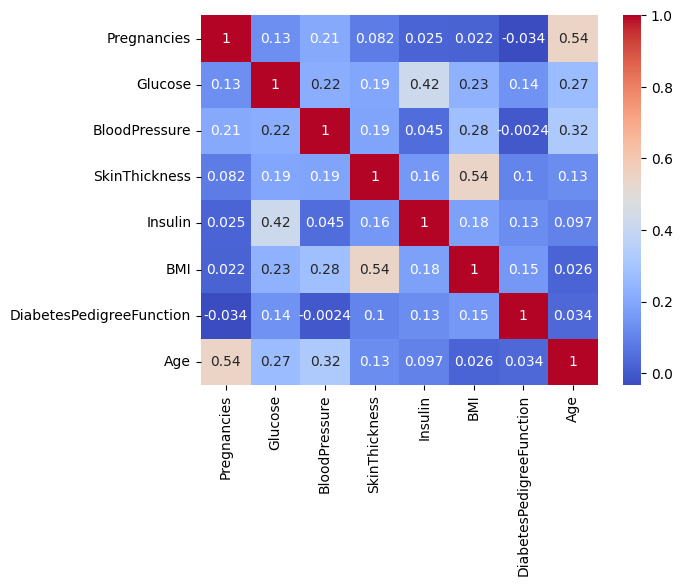

In [45]:
# Check multicollinearity
correlation_matrix = features_scaled_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = features_scaled_df.columns
vif_data['VIF'] = [variance_inflation_factor(features_scaled_df.values, i) for i in range(features_scaled_df.shape[1])]

vif_data

,feature,VIF
0,Pregnancies,1.430466
1,Glucose,1.361314
2,BloodPressure,1.242670
3,SkinThickness,1.451029
4,Insulin,1.239392
5,BMI,1.572588
6,DiabetesPedigreeFunction,1.048391
7,Age,1.616142


In [47]:
y = pima['Outcome'] #dependent variable
x = features_scaled_df

In [48]:
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [49]:
from imblearn.over_sampling import SMOTE
# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to generate synthetic samples
X, Y = smote.fit_resample(x, y)

In [50]:
Y.value_counts()

Outcome
1    500
0    500
Name: count, dtype: int64

In [51]:
#conventional stats: logit method
# Logistic Regression with statsmodels
#import statsmodels.api as sm

X_sm = sm.add_constant(X)
model = sm.Logit(Y, X_sm)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.485885
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      991
Method:                           MLE   Df Model:                            8
Date:                Mon, 27 Jan 2025   Pseudo R-squ.:                  0.2990
Time:                        16:22:54   Log-Likelihood:                -485.88
converged:                       True   LL-Null:                       -693.15
Covariance Type:            nonrobust   LLR p-value:                 1.461e-84
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.2515      0.080     -3.130      0.002      -0.409

In [52]:
import statsmodels.formula.api as smf
log_reg = smf.logit("Outcome ~ Pregnancies + Glucose + DiabetesPedigreeFunction + BMI", data=pima).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.466384
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      763
Method:                           MLE   Df Model:                            4
Date:                Mon, 27 Jan 2025   Pseudo R-squ.:                  0.2789
Time:                        16:23:00   Log-Likelihood:                -358.18
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 9.317e-59
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -9.1840      0.706    -13.015      0.000     -10.567      -7.801
Pregnancies                  0.1433      0.028      5.203      0.000       0.089       0.197
Glucose                      0.0369      0.003     10.574      0.000       0.030       0.044
DiabetesPedigreeFunction     0.8817      0.295      2.992      0.003       0.304       1.459
BMI                          0.0887      0.015      6.025      0.000       0.060       0.118
============================================================================================
"""

In [53]:
# Feature Engineering
features_scaled_df['Glucose_Insulin'] = features_scaled_df['Glucose'] * features_scaled_df['Insulin']
features_scaled_df['Age_Pregnancies'] = features_scaled_df['Age'] * features_scaled_df['Pregnancies']
features_scaled_df['BMI_Squared'] = features_scaled_df['BMI'] ** 2
features_scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Glucose_Insulin,Age_Pregnancies,BMI_Squared
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995,-0.157223,0.912562,0.027762
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672,0.218769,0.161096,0.726244
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584,-0.366107,-0.130278,1.775557
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549,0.580415,0.879990,0.401806
4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496,0.159683,0.023404,2.400338


Using Sklearn approach

In [54]:
y = pima['Outcome'] #dependent variable
x = features_scaled_df

In [55]:
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [56]:
from imblearn.over_sampling import SMOTE
# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to generate synthetic samples
X, Y = smote.fit_resample(x, y)

In [57]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Glucose_Insulin,Age_Pregnancies,BMI_Squared
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995,-0.157223,0.912562,0.027762
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672,0.218769,0.161096,0.726244
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584,-0.366107,-0.130278,1.775557
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549,0.580415,0.879990,0.401806
4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496,0.159683,0.023404,2.400338


In [58]:
#conventional stats: logit method
# Logistic Regression with statsmodels
#import statsmodels.api as sm

X_sm = sm.add_constant(X)
model = sm.Logit(Y, X_sm)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.469481
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      988
Method:                           MLE   Df Model:                           11
Date:                Mon, 27 Jan 2025   Pseudo R-squ.:                  0.3227
Time:                        16:25:37   Log-Likelihood:                -469.48
converged:                       True   LL-Null:                       -693.15
Covariance Type:            nonrobust   LLR p-value:                 5.325e-89
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.1311      0.105      1.246      0.213      -0.075

In [59]:
fnew = X.drop(["SkinThickness","Insulin","BloodPressure","Age"],axis=1)
X_sm = sm.add_constant(fnew)
model = sm.Logit(Y, X_sm)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.472200
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      992
Method:                           MLE   Df Model:                            7
Date:                Mon, 27 Jan 2025   Pseudo R-squ.:                  0.3188
Time:                        16:25:45   Log-Likelihood:                -472.20
converged:                       True   LL-Null:                       -693.15
Covariance Type:            nonrobust   LLR p-value:                 2.443e-91
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.1385      0.103      1.341      0.180      -0.064

Removed all insignificant now all remaining are significant

In [60]:
#logistics without tuning and significant variables

fnew = X.drop(["SkinThickness","Insulin","BloodPressure","Age"],axis=1)
# Logistic Regression with sklearn on significant columns
X_train, X_test, y_train, y_test = train_test_split(fnew, Y, test_size=0.3, random_state=42)

log_reg = LogisticRegression(solver='liblinear')

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.72      0.75       149
           1       0.75      0.81      0.78       151

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.77      0.77      0.77       300

[[107  42]
 [ 28 123]]


In [61]:
y_predtrain = log_reg.predict(X_train)

print(classification_report(y_train, y_predtrain))


              precision    recall  f1-score   support

           0       0.78      0.77      0.78       351
           1       0.77      0.78      0.78       349

    accuracy                           0.78       700
   macro avg       0.78      0.78      0.78       700
weighted avg       0.78      0.78      0.78       700



In [62]:
# Logistic Regression + tuning with original features
X_train, X_test, y_train, y_test = train_test_split(fnew, Y, test_size=0.3, random_state=42)

In [63]:
# Model Tuning: balanced data followed by significant variables
param_grid = {'C': np.logspace(-4, 4, 10), 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print('Best Parameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)

Best Parameters: {'C': np.float64(0.3593813663804626), 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.7685714285714286


In [64]:
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.72      0.76       149
           1       0.75      0.81      0.78       151

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.77      0.77      0.77       300



In [65]:
y_predtrain = grid_search.predict(X_train)

print(classification_report(y_train, y_predtrain))


              precision    recall  f1-score   support

           0       0.77      0.78      0.77       351
           1       0.77      0.77      0.77       349

    accuracy                           0.77       700
   macro avg       0.77      0.77      0.77       700
weighted avg       0.77      0.77      0.77       700



Finally no more overfitted.